<a href="https://colab.research.google.com/github/zetaqubit/udlbook/blob/main/Notebooks/Chap16/16_3_Contraction_Mappings_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 16.3: Contraction mappings**

This notebook investigates a 1D normalizing flows example similar to that illustrated in figure 16.9 in the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a function that is a contraction mapping
def f(z):
    return 0.3 + 0.5 *z + 0.02 * np.sin(z*15)

In [3]:
def draw_function(f, fixed_point=None):
  z = np.arange(0,1,0.01)
  z_prime = f(z)

  # Draw this function
  fig, ax = plt.subplots()
  ax.plot(z, z_prime,'c-')
  ax.plot([0,1],[0,1],'k--')
  if fixed_point!=None:
    ax.plot(fixed_point, fixed_point, 'ro')
  ax.set_xlim(0,1)
  ax.set_ylim(0,1)
  ax.set_xlabel('Input, $z$')
  ax.set_ylabel('Output, f$[z]$')
  plt.show()

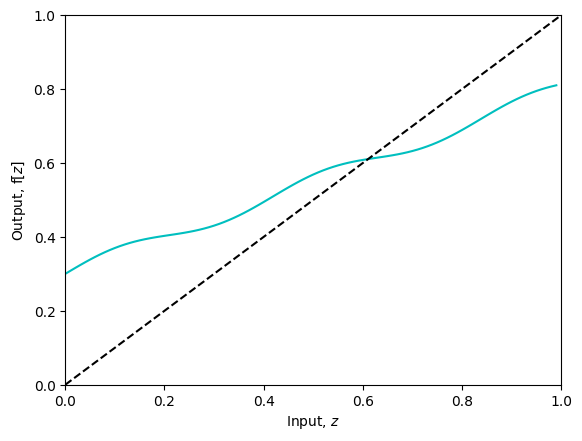

In [4]:
draw_function(f)

Now let's find where $\mbox{f}[z]=z$ using fixed point iteration

In [5]:
# Takes a function f and a starting point z
def fixed_point_iteration(f, z0):
  # TODO -- write this function
  # Print out the iterations as you go, so you can see the progress
  # Set the maximum number of iterations to 20
  # Replace this line
  z_out = z0
  for i in range(20):
    print(i, z_out)
    z_out = f(z_out)
  return z_out

Now let's test that and plot the solution

0 0.2
1 0.40282240016119736
2 0.49664065002928887
3 0.5667073191249141
4 0.5993160568671658
5 0.6080869094934648
6 0.6100202059367561
7 0.6104309330253369
8 0.6105175886576752
9 0.610535845493242
10 0.610539690752657
11 0.610540500591769
12 0.6105406711474377
13 0.6105407070671104
14 0.6105407146319258
15 0.6105407162251035
16 0.6105407165606327
17 0.6105407166312963
18 0.6105407166461783
19 0.6105407166493125


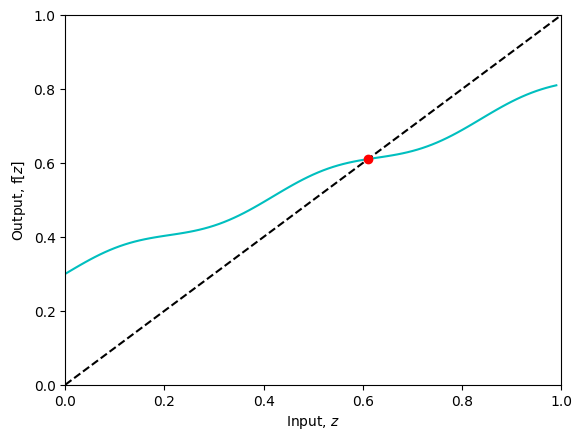

In [6]:
# Now let's test that
z = fixed_point_iteration(f, 0.2)
draw_function(f, z)

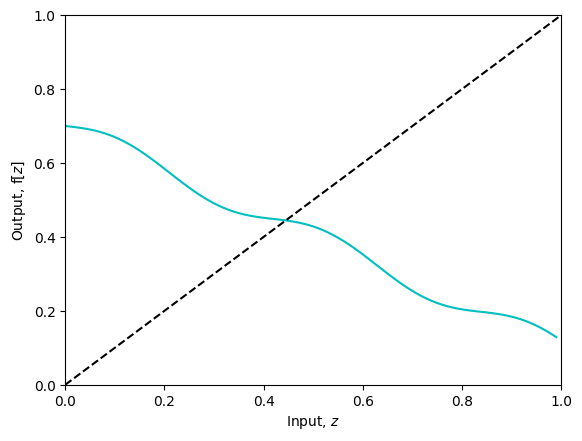

In [7]:
# Let's define another function
def f2(z):
    return 0.7 + -0.6 *z + 0.03 * np.sin(z*15)
draw_function(f2)

0 0.9
1 0.18411353279654855
2 0.6006564203167869
3 0.3516999694124375
4 0.4636120565164512
5 0.44048574625343684
6 0.4452622505917558
7 0.44440761662417244
8 0.4445645964117553
9 0.4445359020873828
10 0.44454115177929304
11 0.444540191492228
12 0.44454036715561257
13 0.44454033502203705
14 0.44454034090014144
15 0.44454033982487656
16 0.44454034002157167
17 0.4445403399855908
18 0.4445403399921727
19 0.44454033999096865


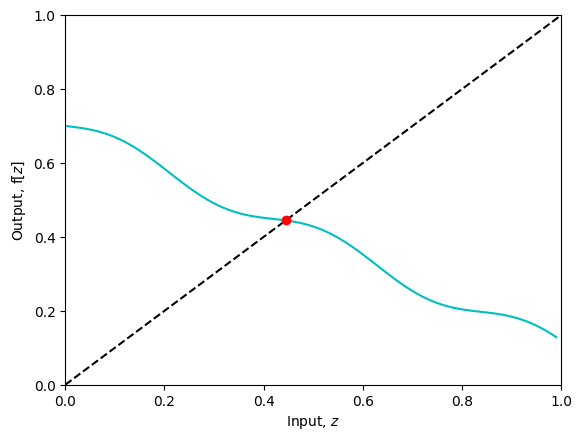

In [8]:
# Now let's test that
# TODO Before running this code, predict what you think will happen
# Fixed point at around 0.45
z = fixed_point_iteration(f2, 0.9)
draw_function(f2, z)

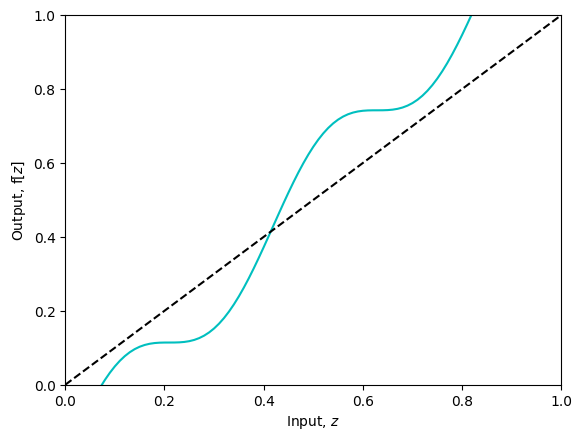

In [9]:
# Let's define another function
# Define a function that is a contraction mapping
def f3(z):
    return -0.2 + 1.5 *z + 0.1 * np.sin(z*15)
draw_function(f3)

0 0.7
1 0.7620304240028328
2 0.852353662816486
3 1.10024944549122
4 1.3789333182004109
5 1.9649445616934311
6 2.6542189306784874
7 3.8669252142339263
8 5.699720559978504
9 8.287262486792992
10 12.13321806346622
11 17.97858000000168
12 26.720079496943235
13 39.78318188656339
14 59.45934708287731
15 88.95736399862616
16 133.30891572678985
17 199.86336857832762
18 299.67155903822714
19 449.35924035906663


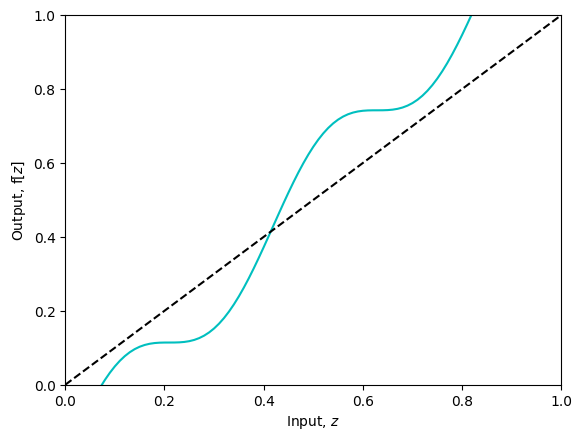

In [10]:
# Now let's test that
# TODO Before running this code, predict what you think will happen
# Not a contraction mapping. Will diverge.
z = fixed_point_iteration(f3, 0.7)
draw_function(f3, z)

Finally, let's invert a problem of the form $y = z+ f[z]$  for a given value of $y$. What is the $z$ that maps to it?

In [13]:
def f4(z):
   return -0.3 + 0.5 *z + 0.02 * np.sin(z*15)

In [17]:
def fixed_point_iteration_z_plus_f(f, y, z0):
  # TODO -- write this function
  # Replace this line
  z_out = z0
  for i in range(20):
    z_out = y - f(z_out)
  return z_out

In [18]:
def draw_function2(f, y, fixed_point=None):
  z = np.arange(0,1,0.01)
  z_prime = z+f(z)

  # Draw this function
  fig, ax = plt.subplots()
  ax.plot(z, z_prime,'c-')
  ax.plot(z, y-f(z),'r-')
  ax.plot([0,1],[0,1],'k--')
  if fixed_point!=None:
    ax.plot(fixed_point, y, 'ro')
  ax.set_xlim(0,1)
  ax.set_ylim(0,1)
  ax.set_xlabel('Input, $z$')
  ax.set_ylabel('Output, z+f$[z]$')
  plt.show()

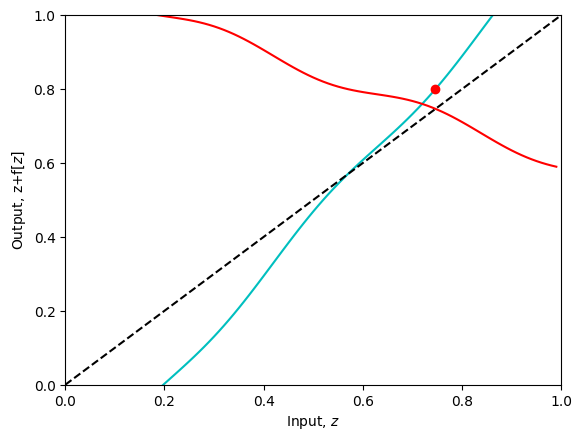

In [19]:
# Test this out and draw
y = 0.8
z = fixed_point_iteration_z_plus_f(f4,y,0.2)
draw_function2(f4,y,z)
# If you have done this correctly, the red dot should be
# where the cyan curve has a y value of 0.8